In [1]:
# lib
import sys

sys.path.append("..")

# set cwd one up
import os

os.chdir("..")
path = "data/hes/Hes1_example.csv"


In [ ]:
from gpcell import utils

X_bckgd, bckgd = utils.load_data(path, "Time (h)", "Cell")

print(len(X_bckgd), len(bckgd))

12 12


In [3]:
X = [X_bckgd[0]]
y_list = [bckgd[0]]

y_standardised = [(y - y.mean()) / y.std() for y in y_list]

from gpflow import Parameter
from gpflow.utilities import to_default_float
from gpflow.kernels import RBF
import tensorflow_probability as tfp

detrend_lengthscale = 7.0

prior_gen = lambda: {  # noqa: E731
    "kernel.lengthscales": Parameter(
        to_default_float(detrend_lengthscale + 0.1),
        transform=tfp.bijectors.Softplus(low=to_default_float(detrend_lengthscale)),
    ),
}

GP_list = utils.fit_processes(X, y_standardised, RBF, prior_gen, verbose=True)

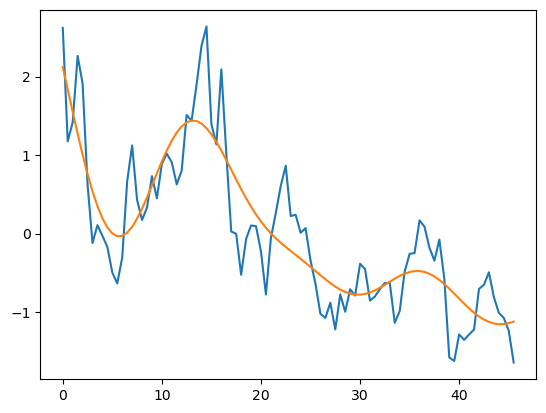

In [4]:
GP = GP_list[0][0]

GP.plot()

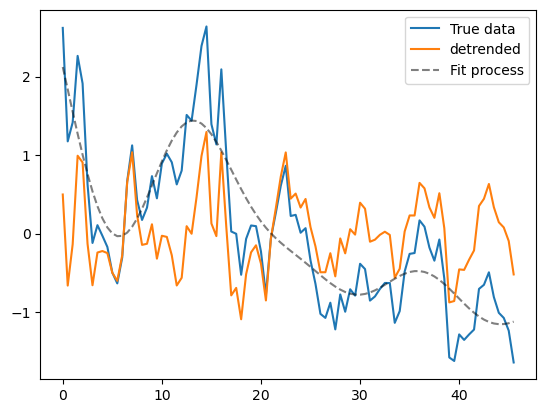

In [10]:
import matplotlib.pyplot as plt

GP = GP_list[0][0]

detrended_y = y_standardised[0] - GP(X[0])[0]
GP.plot(new_y=detrended_y, new_label="detrended")
plt.legend()